In [1]:
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Bitfinex

### Collecting data

In [2]:
mypath = "../raw_data/crypto_data"
onlyfiles = [f for f in listdir(mypath)]


In [3]:
df = pd.read_csv("../raw_data/crypto_data/1inch-usd.csv")
    

In [4]:
df.head()

,time,open,close,high,low,volume,Unnamed: 0
0,1628623620000,2.7621,2.7662,2.7662,2.7621,1259.937600,NaN
1,1628623980000,2.7668,2.7668,2.7668,2.7668,12.660914,NaN
2,1628624100000,2.7610,2.7664,2.7664,2.7610,0.199698,NaN
3,1628624220000,2.7710,2.7710,2.7710,2.7710,0.001921,NaN
4,1628625300000,2.7706,2.7709,2.7709,2.7706,133.633900,NaN


In [5]:
df.columns

Index(['time', 'open', 'close', 'high', 'low', 'volume', 'Unnamed: 0'], dtype='object')

### Cleaning data

In [6]:
df["time"]= pd.to_datetime(df["time"], unit='ms')
df['time']


0      2021-08-10 19:27:00
1      2021-08-10 19:33:00
2      2021-08-10 19:35:00
3      2021-08-10 19:37:00
4      2021-08-10 19:55:00
               ...        
7135   2021-08-29 13:06:00
7136   2021-08-29 13:08:00
7137   2021-08-29 13:10:00
7138   2021-08-29 13:12:00
7139   2021-08-29 13:14:00
Name: time, Length: 7140, dtype: datetime64[ns]

In [7]:
df.isnull().sum()
df = df.drop(columns = ['Unnamed: 0'])

## Dataset Binance

### Collecting data

In [8]:
path = "../raw_data/ETH-USDT.parquet"
eth = pd.read_parquet(path, engine='auto')

In [9]:
eth.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2017-08-17 04:00:00,301.130005,301.130005,301.130005,301.130005,0.42643,128.410873,2,0.42643,128.410873
2017-08-17 04:01:00,301.130005,301.130005,301.130005,301.130005,2.75787,830.477417,4,2.75787,830.477417
2017-08-17 04:02:00,300.000000,300.000000,300.000000,300.000000,0.09930,29.790001,2,0.09930,29.790001
2017-08-17 04:03:00,300.000000,300.000000,300.000000,300.000000,0.31389,94.167000,3,0.00000,0.000000
2017-08-17 04:04:00,301.130005,301.130005,301.130005,301.130005,0.23202,69.868179,1,0.23202,69.868179


### Cleaning data

In [10]:
eth.shape

(2753105, 9)

In [11]:
eth = eth.drop(columns = ['quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'])

In [12]:
eth.head(1)

,open,high,low,close,volume
open_time,,,,,
2017-08-17 04:00:00,301.130005,301.130005,301.130005,301.130005,0.42643


In [13]:
eth.tail(1)

,open,high,low,close,volume
open_time,,,,,
2022-11-16 22:43:00,1205.150024,1206.5,1205.150024,1206.5,143.3013


In [14]:
eth.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [15]:
eth.corr()

,open,high,low,close,volume
open,1.000000,0.999999,0.999999,0.999998,0.067169
high,0.999999,1.000000,0.999998,0.999999,0.067632
low,0.999999,0.999998,1.000000,0.999999,0.066665
close,0.999998,0.999999,0.999999,1.000000,0.067143
volume,0.067169,0.067632,0.066665,0.067143,1.000000


In [16]:
len(np.unique(eth.index)) == eth.shape[0]

True

In [17]:
eth["close"].min()

82.03

In [18]:
eth["close"].max()

4865.22

In [19]:
eth["high-low"] = eth['high'] - eth["low"]

In [20]:
eth["high-low"]

open_time
2017-08-17 04:00:00    0.000000
2017-08-17 04:01:00    0.000000
2017-08-17 04:02:00    0.000000
2017-08-17 04:03:00    0.000000
2017-08-17 04:04:00    0.000000
                         ...   
2022-11-16 22:39:00    0.440063
2022-11-16 22:40:00    0.429932
2022-11-16 22:41:00    0.819946
2022-11-16 22:42:00    0.910034
2022-11-16 22:43:00    1.349976
Name: high-low, Length: 2753105, dtype: float32

In [21]:
eth["open-close"]=eth["open"]- eth["close"]

In [22]:
eth["open-close"]

open_time
2017-08-17 04:00:00    0.000000
2017-08-17 04:01:00    0.000000
2017-08-17 04:02:00    0.000000
2017-08-17 04:03:00    0.000000
2017-08-17 04:04:00    0.000000
                         ...   
2022-11-16 22:39:00   -0.420044
2022-11-16 22:40:00   -0.209961
2022-11-16 22:41:00    0.809937
2022-11-16 22:42:00    0.390015
2022-11-16 22:43:00   -1.349976
Name: open-close, Length: 2753105, dtype: float32

# Preprocess data

## Scaling 

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [24]:
X = eth[["high", "low", "volume", "open", "close"]]
y = eth["close"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [26]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_train)

# TWEETER DATASET

## Loadind the dataset

In [27]:
tweeter = pd.read_csv("../raw_data/Bitcoin_tweets.csv")

/var/folders/7b/bwcmp7pn36529ggfrkdpjyfw0000gn/T/ipykernel_11946/1462444772.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweeter = pd.read_csv("../raw_data/Bitcoin_tweets.csv")


In [28]:
tweeter.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


## Cleanning the dataset

In [29]:
tweeter_verf = tweeter[tweeter["user_verified"]==True]

In [30]:
tweeter_verf.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
65906,Daily Express,London,http://t.co/xNo7rgb8JJ - Home of the Daily and...,2008-12-05 12:05:48,879107.0,714.0,91.0,True,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,"['Bitcoin', 'bitcoin', 'btc', 'Crypto']",TweetDeck,False
66378,BTCC,NaN,BTCC is the world-leading cryptocurrency deriv...,2014-02-11 11:35:46,81172.0,277.0,2830.0,True,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,"['BTC', 'Bitcoin', 'crypto']",Twitter Web App,False
66447,BtcTurk | PRO,NaN,Join over 3 million others from 7 continents. ...,2013-07-01 10:10:48,90749.0,10.0,1700.0,True,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,"['Bitcoin', 'BTC', 'btcturkpro']",Twitter Web App,False
67137,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2017-02-07 05:41:28,69095.0,344.0,124.0,True,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,"['WhatsApp', 'Signal', 'Cryptocurrency']",TweetDeck,False
67248,Herbert R. Sim,"London, England","PhD(c) #Economics #GeoPolitics #AI, MBA | VC...",2009-08-14 04:44:14,147300.0,142305.0,16909.0,True,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",['Bitcoin'],Twitter for Android,False


In [31]:
is_retweed = tweeter_verf[tweeter_verf["is_retweet"]==True]
is_retweed.shape

(0, 13)

In [32]:
tweets = tweeter_verf[["user_name", "text", "date"]]

In [33]:
tweets = tweets.reset_index()
tweets

,index,user_name,text,date
0,65906,Daily Express,Bitcoin price crash: Cryptocurrency plunges in...,2021-04-07 12:03:04
1,66378,BTCC,The #BTC is stuck inside a large range between...,2021-04-07 10:03:34
2,66447,BtcTurk | PRO,Price data of #Bitcoin #BTC pairs on #btcturkp...,2021-04-07 09:42:48
3,67137,LatestLY,#WhatsApp rival #Signal reportedly testing pee...,2021-04-07 05:37:45
4,67248,Herbert R. Sim,"When supply is more than demand, what happens?...",2021-04-07 04:44:25
...,...,...,...,...
24665,4325191,DustyBC Crypto,Do you think #Bitcoin will go lower than $17k ...,2022-10-11 17:55:00
24666,4325355,Jeremy Gardner,Nothing warms the soul like a crypto conferenc...,2022-10-11 17:47:53
24667,57409629,Whale Coin Talk,Join us tomorrow 11/21 with @VRYNT_ at 12 PM E...,2022-11-20 19:48:47
24668,57410966,Bitcoin News,One of the bets made on the slot was destined ...,2022-11-20 21:31:49


### NLP

In [88]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
import unidecode
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
from nltk.stem.porter import *

In [38]:
def clean (text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    unaccented_string = unidecode.unidecode(lowercased) # remove accents
    words = unaccented_string.split()
    
    #tokenized = word_tokenize(unaccented_string) # Tokenize
    
    words_only = [word for word in words if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    word = [PorterStemmer().stem(w) for w in without_stopwords]
    # print(words)

    return " ".join(word)
text = "Héllo 34 world!"
print(clean(text=text))

hello world


In [39]:
tweets["clean_text"]= tweets["text"].apply(clean)

In [42]:
def compute_vader_scores(tweets, label):
    sid = SentimentIntensityAnalyzer()
    idx = 0
    for sentence in tweets["clean_text"]:   
        # print(sid.polarity_scores(sentence))
        tweets.loc[idx,"vader_neg"] = sid.polarity_scores(sentence)["neg"]
        tweets.loc[idx,"vader_neu"] = sid.polarity_scores(sentence)["neu"]
        tweets.loc[idx,"vader_pos"] = sid.polarity_scores(sentence)["pos"]
        tweets.loc[idx,"vader_comp"] = sid.polarity_scores(sentence)["compound"]
        idx+=1
    #tweets['cleantext2'] = tweets[label].apply(lambda x: unlist(x))
    return tweets                             
                                               

In [44]:
tweets_2 = compute_vader_scores(tweets,'clean_text')

In [46]:
tweets_2

,index,user_name,text,date,clean_text,vader_neg,vader_neu,vader_pos,vader_comp
0,65906,Daily Express,Bitcoin price crash: Cryptocurrency plunges in...,2021-04-07 12:03:04,bitcoin price crash cryptocurr plung valu drop...,0.286,0.714,0.000,-0.5859
1,66378,BTCC,The #BTC is stuck inside a large range between...,2021-04-07 10:03:34,btc stuck insid larg rang recent day bitcoin c...,0.167,0.833,0.000,-0.2500
2,66447,BtcTurk | PRO,Price data of #Bitcoin #BTC pairs on #btcturkp...,2021-04-07 09:42:48,price data bitcoin btc pair btcturkpro trade b...,0.000,1.000,0.000,0.0000
3,67137,LatestLY,#WhatsApp rival #Signal reportedly testing pee...,2021-04-07 05:37:45,whatsapp rival signal reportedli test peer pee...,0.000,1.000,0.000,0.0000
4,67248,Herbert R. Sim,"When supply is more than demand, what happens?...",2021-04-07 04:44:25,suppli demand happen bitcoin best way hedg fia...,0.102,0.612,0.286,0.5719
...,...,...,...,...,...,...,...,...,...
24665,4325191,DustyBC Crypto,Do you think #Bitcoin will go lower than $17k ...,2022-10-11 17:55:00,think bitcoin go lower year ye,0.306,0.694,0.000,-0.2960
24666,4325355,Jeremy Gardner,Nothing warms the soul like a crypto conferenc...,2022-10-11 17:47:53,noth warm soul like crypto confer bear market ...,0.120,0.733,0.147,-0.0516
24667,57409629,Whale Coin Talk,Join us tomorrow 11/21 with @VRYNT_ at 12 PM E...,2022-11-20 19:48:47,join us tomorrow vrynt pm est pm utc set remin...,0.000,0.913,0.087,0.2960
24668,57410966,Bitcoin News,One of the bets made on the slot was destined ...,2022-11-20 21:31:49,one bet made slot destin land massiv win btc b...,0.000,0.743,0.257,0.5859


In [54]:
class0=[]
for i in range(len(tweets_2)):
    if tweets_2.loc[i,'vader_neg']>0:
        class0+=["neg"]
    elif tweets_2.loc[i,'vader_pos']>0:
        class0+=["pos"]        
    else:
        class0+=["else"]  

In [55]:
tweets['class']=class0
tweets['class'].value_counts()

else    10158
pos      8561
neg      5951
Name: class, dtype: int64

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', tweets['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(tweets['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 bitcoin price crash cryptocurr plung valu drop hour bitcoin bitcoin btc crypto http co
After Tokenization & Padding 
 [  1  10 200   6 681 106 108  82   1   1   4   5   3   2   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [60]:
print(X.shape)

(24670, 50)


### Model

In [61]:
y = pd.get_dummies(tweets['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (14802, 50) (14802, 3)
Validation Set:  (4934, 50) (4934, 3)
Test Set:  (4934, 50) (4934, 3)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [76]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [79]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [80]:
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

/Users/nozak/.pyenv/versions/crypto/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 32)            1056      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                

In [81]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [82]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [83]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10
232/232 [==============================] - 5s 11ms/step - loss: 1.0249 - accuracy: 0.4676 - precision_1: 0.6271 - recall_1: 0.1493 - val_loss: 0.9983 - val_accuracy: 0.4921 - val_precision_1: 0.6167 - val_recall_1: 0.2195
Epoch 2/10
232/232 [==============================] - 2s 8ms/step - loss: 0.9876 - accuracy: 0.5030 - precision_1: 0.6394 - recall_1: 0.2141 - val_loss: 0.9804 - val_accuracy: 0.4953 - val_precision_1: 0.6611 - val_recall_1: 0.1988
Epoch 3/10
232/232 [==============================] - 2s 8ms/step - loss: 0.9656 - accuracy: 0.5228 - precision_1: 0.6626 - recall_1: 0.2334 - val_loss: 0.9621 - val_accuracy: 0.5140 - val_precision_1: 0.6440 - val_recall_1: 0.2479
Epoch 4/10
232/232 [==============================] - 2s 8ms/step - loss: 0.9365 - accuracy: 0.5456 - precision_1: 0.6850 - recall_1: 0.2672 - val_loss: 0.9284 - val_accuracy: 0.5359 - val_precision_1: 0.6995 - val_recall_1: 0.2487
Epoch 5/10
232/232 [==============================] - 2s 8ms/step - los

In [84]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7191
Precision : 0.7400
Recall    : 0.6895
F1 Score  : 0.7139


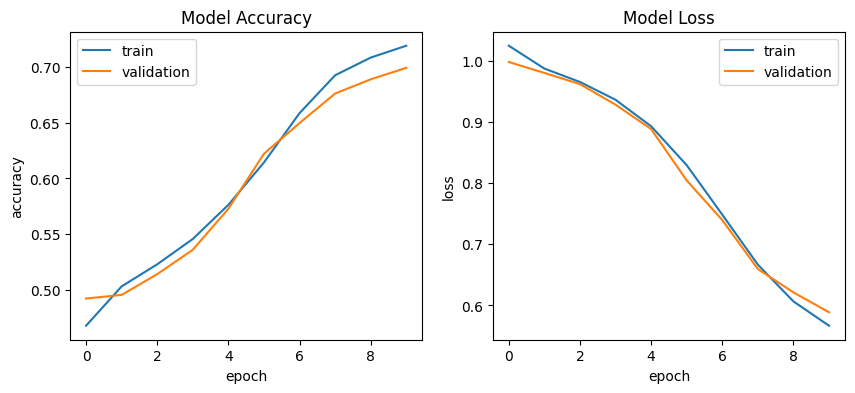

In [85]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [86]:
y_pred = model.predict(X_test)

155/155 [==============================] - 1s 2ms/step


In [87]:
y_pred

array([[9.04529728e-03, 2.99170226e-01, 6.91784441e-01],
       [8.23375225e-01, 6.70605674e-02, 1.09564155e-01],
       [7.61477742e-04, 3.93119305e-01, 6.06119275e-01],
       ...,
       [6.26991838e-02, 2.92826325e-01, 6.44474447e-01],
       [2.03098884e-04, 4.06275809e-01, 5.93521059e-01],
       [7.90624559e-01, 8.67560580e-02, 1.22619368e-01]], dtype=float32)

### Loading model

In [89]:
from tensorflow.keras import models

In [90]:
models.save_model(model, 'tweeter_model')

INFO:tensorflow:Assets written to: tweeter_model/assets


INFO:tensorflow:Assets written to: tweeter_model/assets


In [ ]:
np.savez("./BTC-USDT.npz",df[["open_time"]],df[["close"]])

In [ ]:
npz = np.load("./BTC-USDT.npz")
df1 = pd.DataFrame(npz["arr_0"])
df2 = pd.DataFrame(npz["arr_1"])

df = pd.concat([df1,df2],axis=1)
df.columns = ["open_time","close"]
df.head()